In [1]:
import numpy as np                                                #importing numpy 
import pandas as pd                                                #pandas for data manipulation
import matplotlib.pyplot as plt                                    #plotting library
from datetime import datetime

In [2]:
data = pd.read_csv('Rose.csv')
data.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [4]:
data['YearMonth'] = pd.to_datetime(data.YearMonth,errors='coerce')                #changed datatype of year month

In [5]:
data.head()

,YearMonth,Rose
0,1980-01-01,112.0
1,1980-02-01,118.0
2,1980-03-01,129.0
3,1980-04-01,99.0
4,1980-05-01,116.0


In [6]:
data.info()                                           #now data type is datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   YearMonth  187 non-null    datetime64[ns]
 1   Rose       185 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.0 KB


In [10]:
data.set_index('YearMonth',inplace=True)

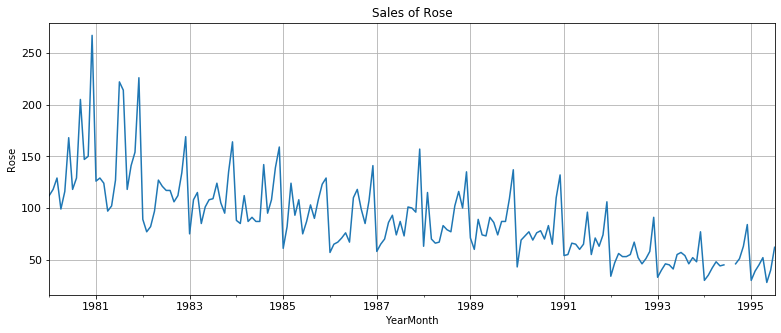

In [16]:
data['Rose'].plot(figsize=(13,5), fontsize=11)
plt.grid()
plt.title('Sales of Rose')
plt.xlabel('YearMonth')
plt.ylabel('Rose')
plt.show()


Clearly we can see decresing trend in rose sale over the years

In [17]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing                  #importing exponential smoothing
from statsmodels.tsa.seasonal import seasonal_decompose                      # importing seasonal decompose for checking components of time series

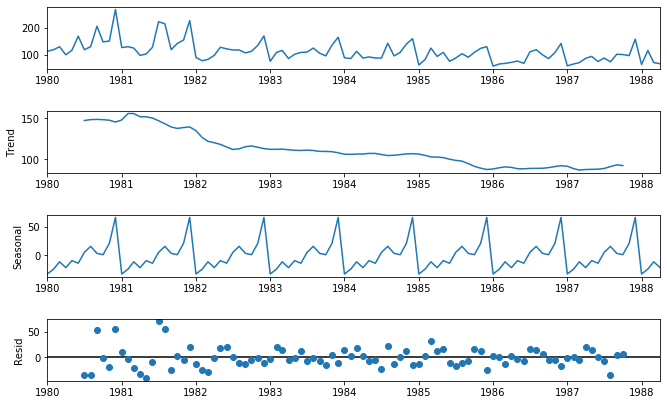

In [18]:
decomp = seasonal_decompose(data[:100],model='additive')
fig = decomp.plot()
fig.set_size_inches(10,6)

seasonal_decompose method breaks down a time series into 3 components
1. Trend of the data
2. Seasonality in data
3. Residual/Error in data


As we can see from above figure, there is decreasing trend and seasnoanlity in time series data

In [19]:
decomp.seasonal[:25]                                  #checking the period of seasonality 

YearMonth
1980-01-01   -32.839286
1980-02-01   -24.178571
1980-03-01   -11.369048
1980-04-01   -21.613095
1980-05-01    -9.297619
1980-06-01   -13.892857
1980-07-01     5.136161
1980-08-01    15.781994
1980-09-01     3.479911
1980-10-01     1.084077
1980-11-01    21.148810
1980-12-01    66.559524
1981-01-01   -32.839286
1981-02-01   -24.178571
1981-03-01   -11.369048
1981-04-01   -21.613095
1981-05-01    -9.297619
1981-06-01   -13.892857
1981-07-01     5.136161
1981-08-01    15.781994
1981-09-01     3.479911
1981-10-01     1.084077
1981-11-01    21.148810
1981-12-01    66.559524
1982-01-01   -32.839286
Name: seasonal, dtype: float64

In [20]:
train,test = data[:-40],data[-40:]                     #break down of data into training and test data 

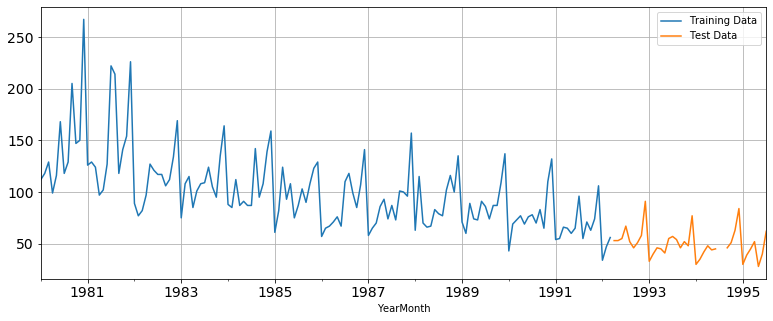

In [21]:
train['Rose'].plot(figsize=(13,5), fontsize=14)                  #plotting training data
test['Rose'].plot(figsize=(13,5), fontsize=14)                   #plotting test data
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

### Exponential smoothing

In [22]:
Exp =ExponentialSmoothing(train,trend='additive',seasonal='additive',seasonal_periods=12).fit(optimized=True)          #calling and fitting exponential smoothing method

C:\Users\ADMIN\.conda\envs\tensor\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ADMIN\.conda\envs\tensor\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\ADMIN\.conda\envs\tensor\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [23]:
prediction = Exp.predict(start = len(train),end=len(train)+len(test)-1)                 #prediction of rose

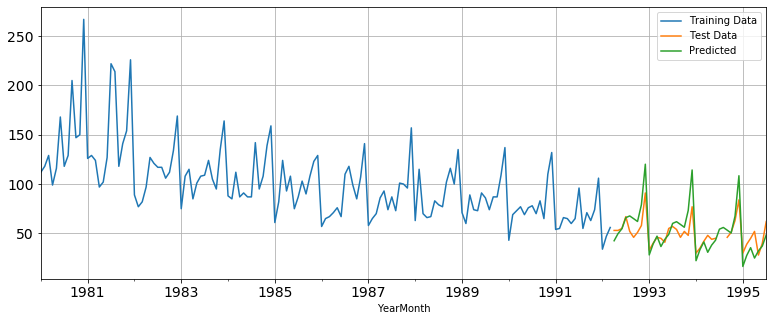

In [27]:
train['Rose'].plot(figsize=(13,5), fontsize=14)                 #plotting train data
test['Rose'].plot(figsize=(13,5), fontsize=14)                  #plotting test data
prediction.plot(figsize=(13,5),fontsize=14)                     #plotting predicting values
plt.grid()
plt.legend(['Training Data','Test Data','Predicted'])
plt.show()

## Random Forest

In [38]:
df=data.reset_index()                                        #resetting the index           

In [39]:
df.head()                                                     #top 5 rows of time series data

,YearMonth,Rose
0,1980-01-01,112.0
1,1980-02-01,118.0
2,1980-03-01,129.0
3,1980-04-01,99.0
4,1980-05-01,116.0


In [40]:
df.isnull().sum()                                              #checking null values in data

YearMonth    0
Rose         2
dtype: int64

In [41]:
df.dropna(inplace=True)                                       # dropping null values                                        

### Extracting features from date 

In [42]:
df['Day'] = df.YearMonth.dt.day                                  
df['Week_Day'] = df.YearMonth.dt.dayofweek
df['Month'] = df.YearMonth.dt.month
df['Quarter']=df.YearMonth.dt.quarter
df['Year'] = df.YearMonth.dt.year

In [43]:
df.head()

,YearMonth,Rose,Day,Week_Day,Month,Quarter,Year
0,1980-01-01,112.0,1,1,1,1,1980
1,1980-02-01,118.0,1,4,2,1,1980
2,1980-03-01,129.0,1,5,3,1,1980
3,1980-04-01,99.0,1,1,4,2,1980
4,1980-05-01,116.0,1,3,5,2,1980


In [44]:
X = df.iloc[:,2:]                                                             #independent variables
X.head()

,Day,Week_Day,Month,Quarter,Year
0,1,1,1,1,1980
1,1,4,2,1,1980
2,1,5,3,1,1980
3,1,1,4,2,1980
4,1,3,5,2,1980


In [45]:
y = df[['Rose']]                                                           #dependent variable
y.head()

,Rose
0,112.0
1,118.0
2,129.0
3,99.0
4,116.0


In [46]:
from sklearn.model_selection import train_test_split                                  #importing train test split 
from sklearn.ensemble import RandomForestRegressor                                    #importing random forest

In [47]:
X_train, X_test, y_train, y_test = train_test_split(                        #splitting of data into training and test data
...     X, y, test_size=0.25, random_state=42)

In [48]:
RF =RandomForestRegressor().fit(X_train,y_train)                            #calling and fitting random forest

C:\Users\ADMIN\.conda\envs\tensor\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [49]:
RF_prediction = RF.predict(X_test)                             #predicting values using random forest

#### Comparision of actual and predicted values

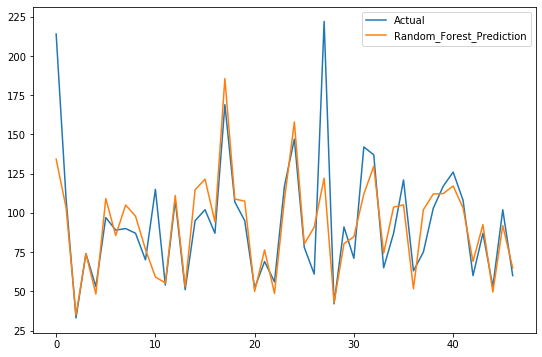

In [52]:
pd.DataFrame({'Actual':y_test.values.flatten(),'Random_Forest_Prediction':RF_prediction.flatten()}).plot(figsize=(9,6))

## Fb Prophet

In [53]:
from fbprophet import Prophet                                             #importing prophet model

In [57]:
data1 = data.reset_index()                                        #resetting index
data1.head()

,YearMonth,Rose
0,1980-01-01,112.0
1,1980-02-01,118.0
2,1980-03-01,129.0
3,1980-04-01,99.0
4,1980-05-01,116.0


In [58]:
data1.rename(columns={'YearMonth':'ds','Rose':'y'},inplace=True)                   #renaming columns

In [59]:
data1.head()

,ds,y
0,1980-01-01,112.0
1,1980-02-01,118.0
2,1980-03-01,129.0
3,1980-04-01,99.0
4,1980-05-01,116.0


In [60]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      187 non-null    datetime64[ns]
 1   y       185 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.0 KB


In [85]:
model = Prophet()                                  #calling and fitting Prophet model
model.fit(data1)             

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [86]:
model.seasonalities                                           #checking seasonality 

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [87]:
future_date = model.make_future_dataframe(periods=10)                        

In [88]:
prediction = model.predict(future_date)

In [89]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1980-01-01,145.708653,92.311639,139.330707,145.708653,145.708653,-29.209401,-29.209401,-29.209401,-29.209401,-29.209401,-29.209401,0.0,0.0,0.0,116.499252
1,1980-02-01,145.022015,106.726138,151.295929,145.022015,145.022015,-15.594538,-15.594538,-15.594538,-15.594538,-15.594538,-15.594538,0.0,0.0,0.0,129.427477
2,1980-03-01,144.379677,113.558530,158.762339,144.379677,144.379677,-7.037031,-7.037031,-7.037031,-7.037031,-7.037031,-7.037031,0.0,0.0,0.0,137.342647
3,1980-04-01,143.693040,102.225496,148.703686,143.693040,143.693040,-18.632546,-18.632546,-18.632546,-18.632546,-18.632546,-18.632546,0.0,0.0,0.0,125.060493
4,1980-05-01,143.028552,108.125513,151.432737,143.028552,143.028552,-13.458484,-13.458484,-13.458484,-13.458484,-13.458484,-13.458484,0.0,0.0,0.0,129.570069


In [93]:
predicted_data = prediction[['ds','yhat']]

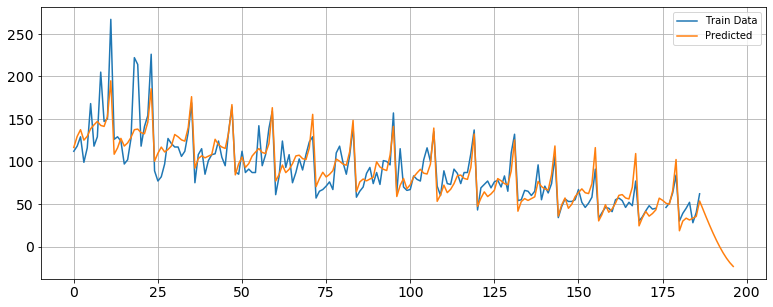

In [94]:
data1['y'].plot(figsize=(13,5), fontsize=14)                                  #plotting actual values
predicted_data['yhat'].plot(figsize=(13,5), fontsize=14)                     #plotting predicting values
plt.grid()
plt.legend(['Train Data','Predicted'])
plt.show()